In [1]:
def generate_sycamore(n, m):
    res_list = []
    for row in range(n - 1):
        for col in range(m):

            c_index = m * row + col
            t_index = (m) * (row + 1) + col
            temp = [c_index, t_index]
            res_list.append(temp)
    for row in range(1, n):
        if row % 2 == 1:
            for col in range(m - 1):
                c_index = m * row + col
                t_index = (m) * (row - 1) + col + 1
                temp = [c_index, t_index]
                res_list.append(temp)
        else:
            for col in range(1, m):
                c_index = m * row + col
                t_index = (m) * (row - 1) + col - 1
                temp = [c_index, t_index]
                res_list.append(temp)

    return res_list

In [2]:
from qiskit_nature.second_q.drivers import PySCFDriver
driver = PySCFDriver(atom="H 0 0 0; H 0 0 0.735", basis="sto-3g")
problem = driver.run()
from qiskit_nature.second_q.mappers import JordanWignerMapper
mapper = JordanWignerMapper()
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)

/common/home/zl606/qiskit-nature/qiskit_nature/deprecation.py:297: PauliSumOpDeprecationWarning: PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.
  return func(*args, **kwargs)


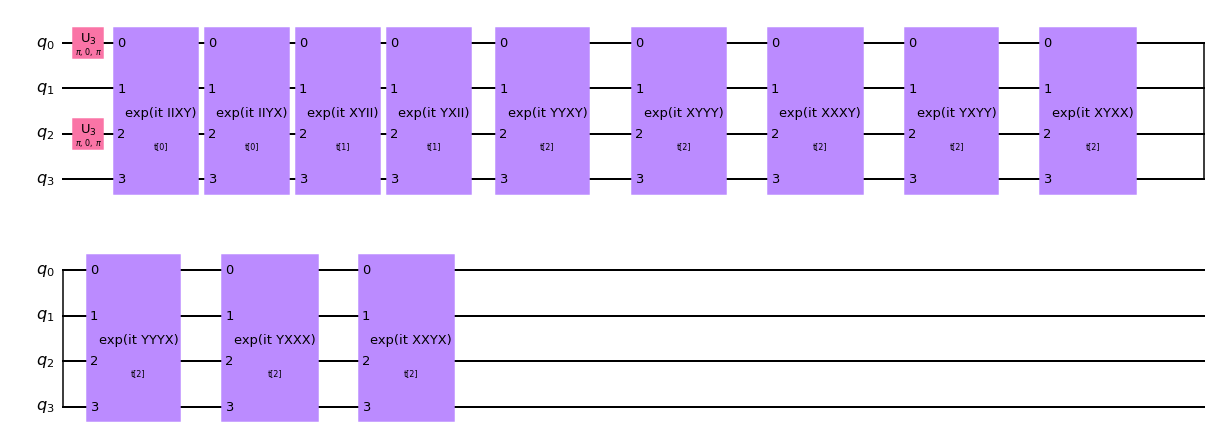

In [3]:
ansatz.decompose(reps=2).draw(output='mpl')

In [4]:
from qiskit.providers.fake_provider import FakeMelbourne
from qiskit import transpile
ansatz_decompose = ansatz.decompose(reps=3)
ansatz_trans = transpile(ansatz_decompose, backend=FakeMelbourne(),routing_method='sabre',optimization_level=2)
print(f'the trans circuit has depth of {ansatz_trans.depth()} with gates are {ansatz_trans.count_ops()}')

the trans circuit has depth of 85 with gates are OrderedDict([('cx', 50), ('u1', 30), ('u2', 28), ('u3', 1)])


In [5]:
ansatz_decompose = ansatz.decompose(reps=3)
coupling_map = [[i, i + 1] for i in range(50 - 1)]
ansatz_trans = transpile(ansatz_decompose, coupling_map = coupling_map,routing_method='sabre',optimization_level=2)
print(f'the trans circuit has depth of {ansatz_trans.depth()} with gates are {ansatz_trans.count_ops()}')

the trans circuit has depth of 68 with gates are OrderedDict([('cx', 50), ('u3', 26), ('rz', 12), ('h', 5)])


In [6]:
ansatz_decompose = ansatz.decompose(reps=3)
coupling_map = generate_sycamore(8,8)
ansatz_trans = transpile(ansatz_decompose, coupling_map = coupling_map,routing_method='sabre',optimization_level=2)
print(f'the trans circuit has depth of {ansatz_trans.depth()} with gates are {ansatz_trans.count_ops()}')

the trans circuit has depth of 68 with gates are OrderedDict([('cx', 50), ('u3', 26), ('rz', 12), ('h', 5)])


In [7]:
from qiskit_nature.second_q.drivers import PySCFDriver
driver = PySCFDriver(atom="H 0 0 0; Li 0 0 0.735", basis="sto-3g")
problem = driver.run()
from qiskit_nature.second_q.mappers import JordanWignerMapper
mapper = JordanWignerMapper()
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
    ),
)
ansatz_decompose = ansatz.decompose(reps=3)
ansatz_trans = transpile(ansatz_decompose, backend=FakeMelbourne(),routing_method='sabre',optimization_level=2)
print(f'the trans circuit has depth of {ansatz_trans.depth()} with gates are {ansatz_trans.count_ops()}')
ansatz_decompose = ansatz.decompose(reps=3)
coupling_map = [[i, i + 1] for i in range(50 - 1)]
ansatz_trans = transpile(ansatz_decompose, coupling_map = coupling_map,routing_method='sabre',optimization_level=2)
print(f'the trans circuit has depth of {ansatz_trans.depth()} with gates are {ansatz_trans.count_ops()}')
ansatz_decompose = ansatz.decompose(reps=3)
coupling_map = generate_sycamore(8,8)
ansatz_trans = transpile(ansatz_decompose, coupling_map = coupling_map,routing_method='sabre',optimization_level=2)
print(f'the trans circuit has depth of {ansatz_trans.depth()} with gates are {ansatz_trans.count_ops()}')

the trans circuit has depth of 14399 with gates are OrderedDict([('cx', 7705), ('u2', 7339), ('u1', 1487)])
the trans circuit has depth of 8566 with gates are OrderedDict([('cx', 7216), ('u3', 1592), ('rz', 640), ('h', 243), ('swap', 178), ('u', 1)])
the trans circuit has depth of 10710 with gates are OrderedDict([('cx', 7244), ('h', 2540), ('u3', 1612), ('rz', 640), ('swap', 204), ('u', 1)])


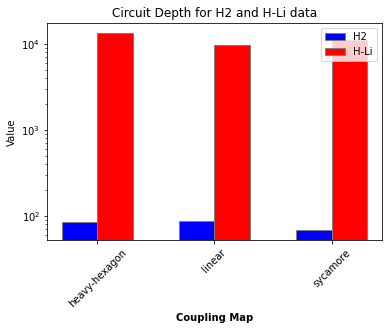

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Data
data_H2 = np.array([85, 87, 68])
data_HLi = np.array([13451, 9603, 11052])
labels = ["heavy-hexagon", "linear", "sycamore"]

# Bar width
bar_width = 0.6

# The x position for the groups
r1 = np.arange(len(data_H2)) * 2
r2 = [x + bar_width for x in r1]

# Create the bars
plt.bar(r1, data_H2, width=bar_width, color='blue', edgecolor='grey', label='H2')
plt.bar(r2, data_HLi, width=bar_width, color='red', edgecolor='grey', label='H-Li')

# Add xticks on the middle of the group bars
plt.xlabel('Coupling Map', fontweight='bold')
plt.xticks([r + bar_width/2 for r in r1], labels,rotation=45)

# Create legend & Show graphic
plt.ylabel('Value')
plt.yscale('log')
plt.title('Circuit Depth for H2 and H-Li data')
plt.legend()

# Show the plot
plt.show()


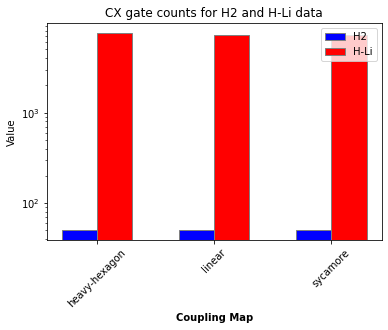

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data
data_H2 = np.array([50, 50, 50])
data_HLi = np.array([7651, 7218, 7220])
labels = ["heavy-hexagon", "linear", "sycamore"]

# Bar width
bar_width = 0.6

# The x position for the groups
r1 = np.arange(len(data_H2)) * 2
r2 = [x + bar_width for x in r1]

# Create the bars
plt.bar(r1, data_H2, width=bar_width, color='blue', edgecolor='grey', label='H2')
plt.bar(r2, data_HLi, width=bar_width, color='red', edgecolor='grey', label='H-Li')

# Add xticks on the middle of the group bars
plt.xlabel('Coupling Map', fontweight='bold')
plt.xticks([r + bar_width/2 for r in r1], labels,rotation=45)

# Create legend & Show graphic
plt.ylabel('Value')
plt.yscale('log')
plt.title('CX gate counts for H2 and H-Li data')
plt.legend()

# Show the plot
plt.show()
